In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [221]:
df = pd.read_csv("train.csv")

In [222]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [223]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [224]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Handling NaN values and Missing values

In [225]:
df.isna().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [226]:
# "PoolQC", "MiscFeature", "Alley", "Fence" these columns has more that 80% NA this means people don't consider
# these feature while buying house, we can remove these columns
df = df.drop(["PoolQC", "MiscFeature", "Alley", "Fence"],axis=1)

In [227]:
df.shape

(1460, 77)

In [228]:
#since FireplaceQu, GarageYrBlt, GarageCond, GarageType, GarageFinish, 
#GarageQual, BsmtFinType2, BsmtExposure, BsmtQual, BsmtCond, BsmtFinType1, MasVnrType has type NA means 
#"that condition is not pfesent" we will replace this NA with none
df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt','GarageFinish', 'GarageQual', 'GarageCond', 'MasVnrType']] = df.loc[:,['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType','GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'MasVnrType']].replace(np.nan, "None")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [229]:
#dropping 1 row with Electrical as NA
df = df[df['Electrical'].notna()]

In [230]:
df.isna().sum().sort_values(ascending=False)
# will handle null for LotFrontage and MasVnrArea later

LotFrontage     259
MasVnrArea        8
Id                0
BedroomAbvGr      0
FireplaceQu       0
               ... 
ExterQual         0
MasVnrType        0
Exterior2nd       0
Exterior1st       0
SalePrice         0
Length: 77, dtype: int64

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1200 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [232]:
df.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [233]:
df.MasVnrArea.value_counts()

0.0      860
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [234]:
## Replacing missing values LotFrontage and MasVnrArea by their means
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)

In [235]:
df.isna().sum().sort_values(ascending=False)

Id             0
HalfBath       0
FireplaceQu    0
Fireplaces     0
Functional     0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 77, dtype: int64

### Data type handling

In [236]:
# MSSubClass, OverallQual, OverallCond -> are categorical variable we need to convert these in Object type
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [237]:
df[['MSSubClass', 'OverallQual', 'OverallCond']].dtypes

MSSubClass     object
OverallQual    object
OverallCond    object
dtype: object

### Target variable univarient analysis

<Axes: xlabel='SalePrice', ylabel='Density'>

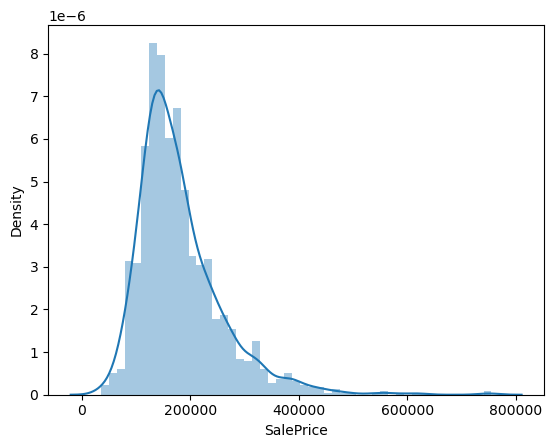

In [238]:
sns.distplot(df.SalePrice)
# in below graph we can see that SalePrice is skewed towards right

In [239]:
# Check the skewness of target variable
df['SalePrice'].skew()

1.8819429948035529

In [240]:
# skewness of target variable is > 1, we need to handle by doing log transformation of SalePrice variable
df['SalePrice'] = np.log(df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

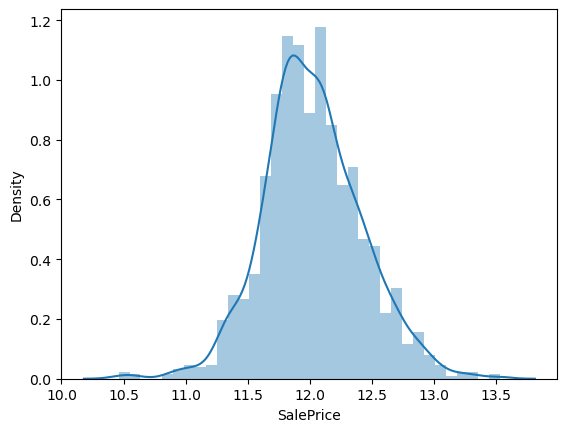

In [241]:
sns.distplot(df.SalePrice)
# now we can see, with log transformation skewness is handled.

### Numeric and categorical variable analysis

In [242]:
#drpping Id as it is not useful
df = df.drop("Id",axis=1)

In [243]:
num_var = df.select_dtypes(include=['int64', 'float64'])
num_var.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
plt.figure(figsize=(40,200))
for i in range(len(num_var.columns)):
    plt.subplot(len(num_var.columns),2,i+1)
    plt.scatter(df[num_var.columns[i]],df.SalePrice)
    plt.ylabel('SalePrice')
    plt.xlabel(num_var.columns[i])
    
# from below graphs we can see many variables has outliers (skewed)

<Figure size 2500x2000 with 0 Axes>

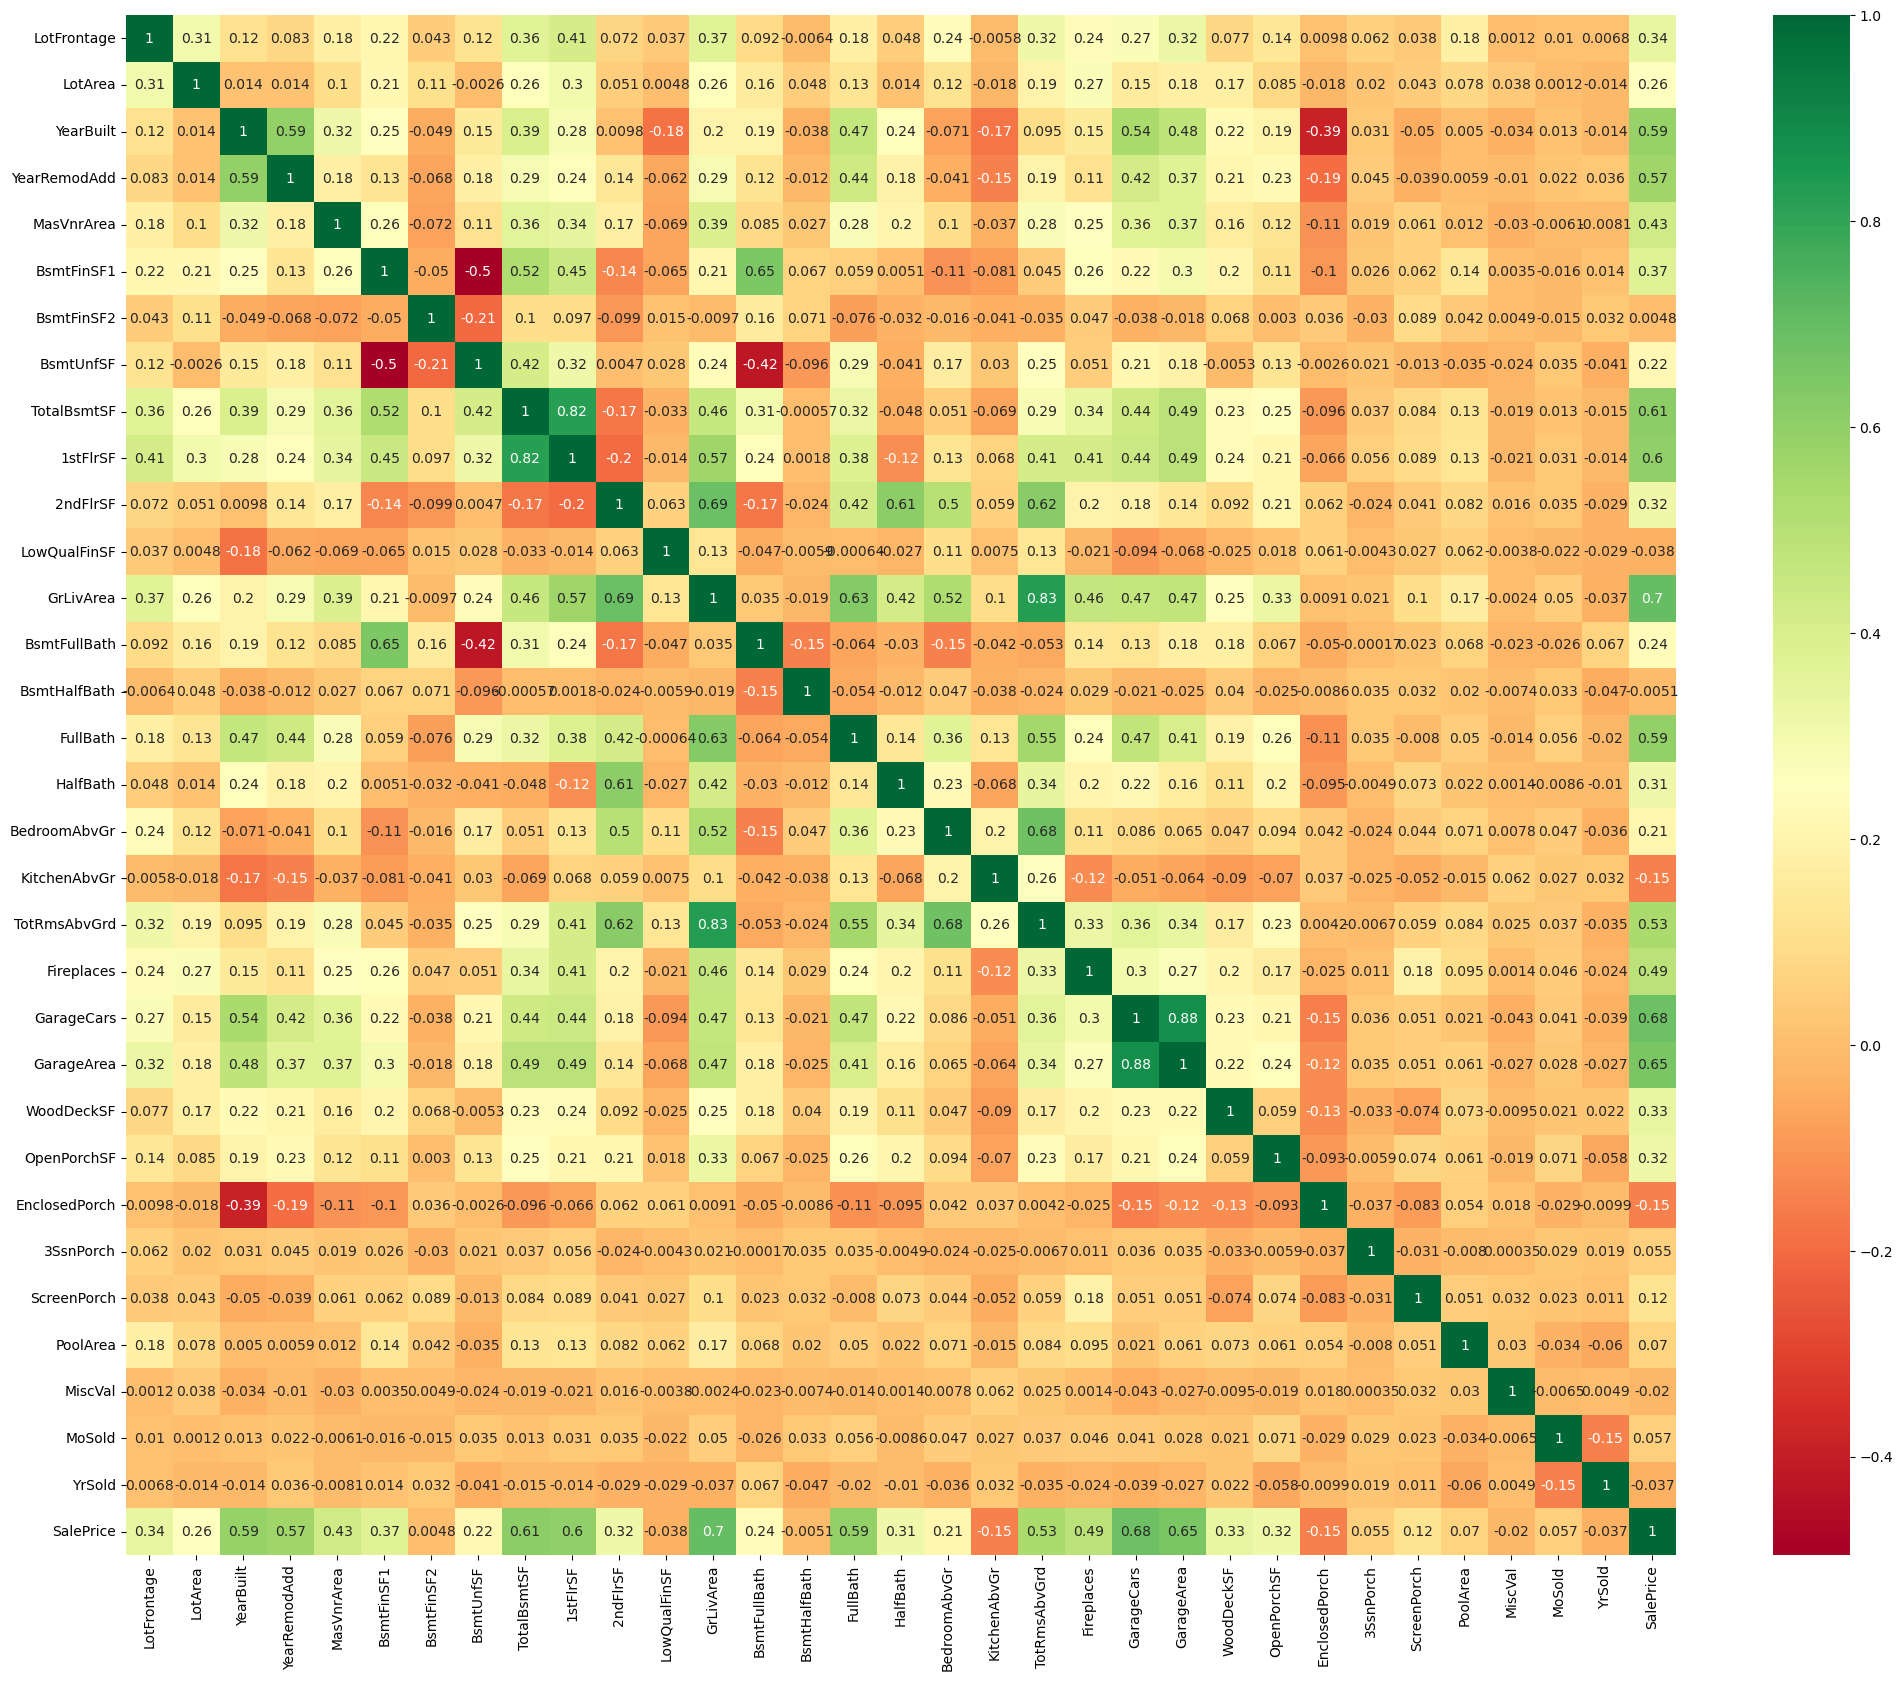

<Figure size 2500x2000 with 0 Axes>

In [245]:
plt.figure(figsize=(25,20))
sns.heatmap(num_var.corr(),annot=True,cmap='RdYlGn')
plt.figure(figsize=(25,20))

In [246]:
# from above heatmap we can see that GrLivArea, GarageCars, GarageArea are highly correlated with salePrice

### Hnalding outliers in num_var

In [247]:
for column in num_var.columns:
    q1 = df[column].quantile(0.05)
    q3 = df[column].quantile(0.95)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df = df.loc[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429216


In [248]:
df.shape

(1264, 76)

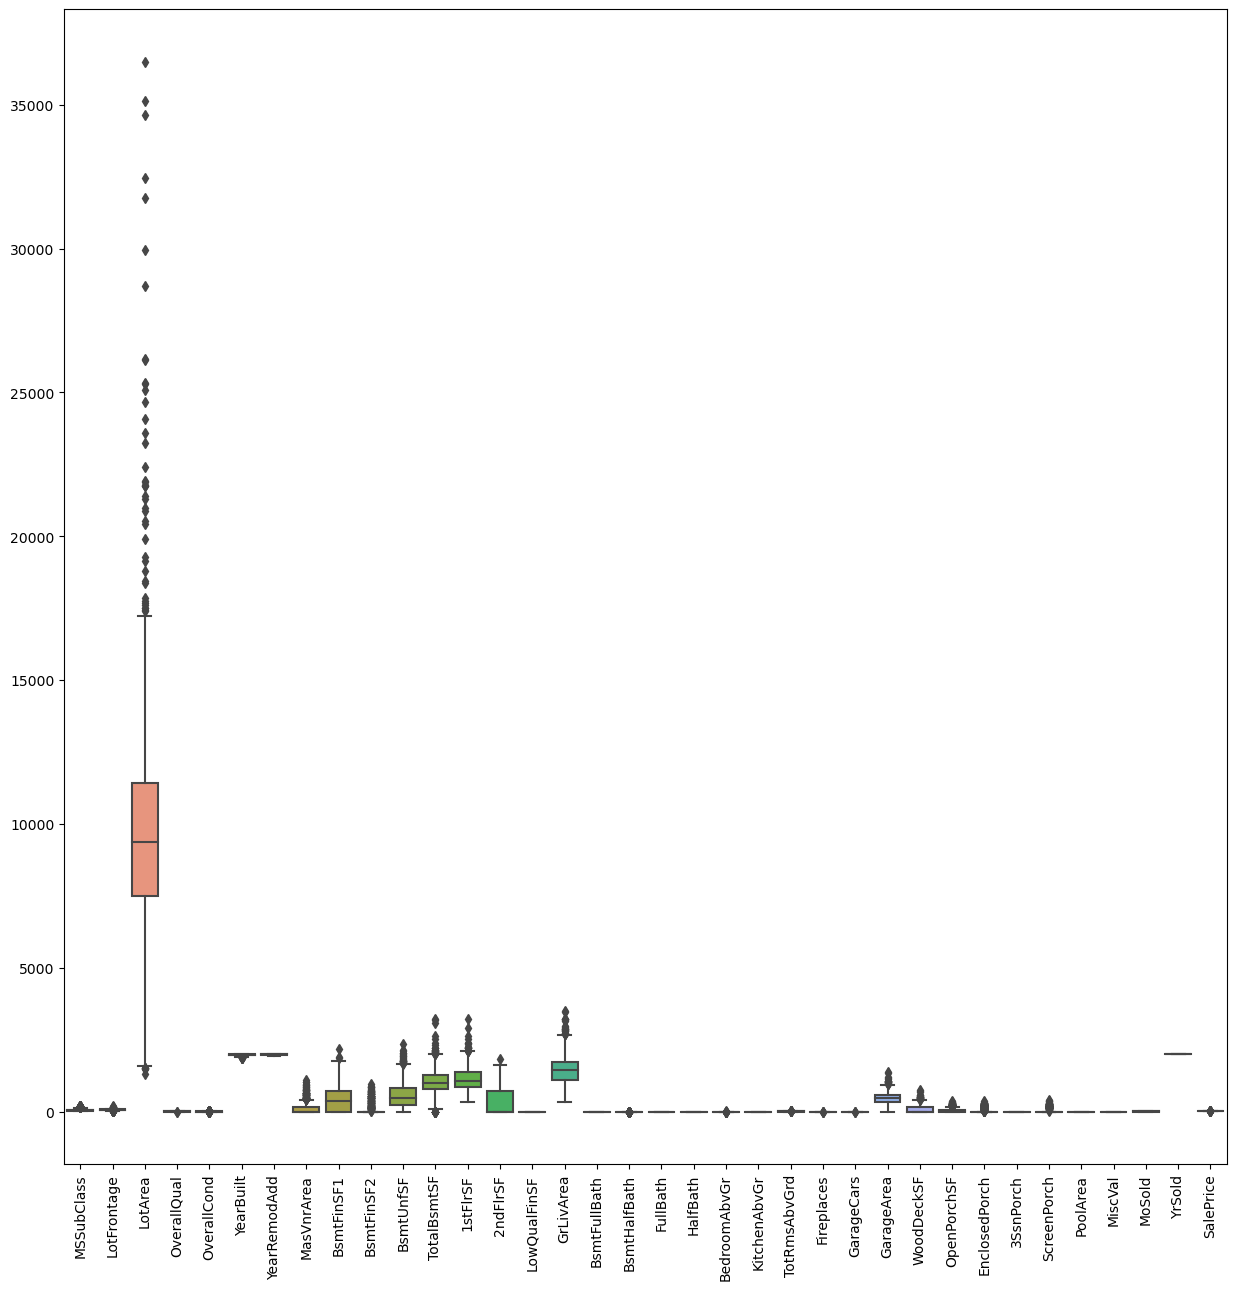

In [249]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df);

### Categorical variable analysis

In [250]:
cat_var = df.select_dtypes(include='object')
cat_var.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [251]:
cat_var.shape

(1264, 43)

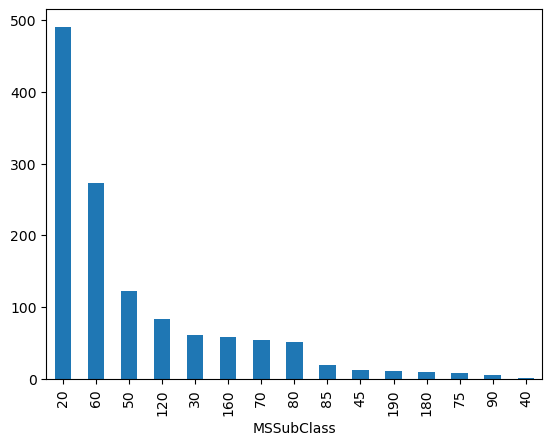

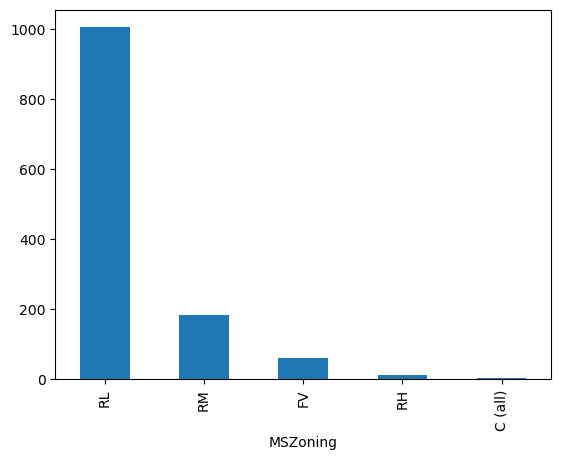

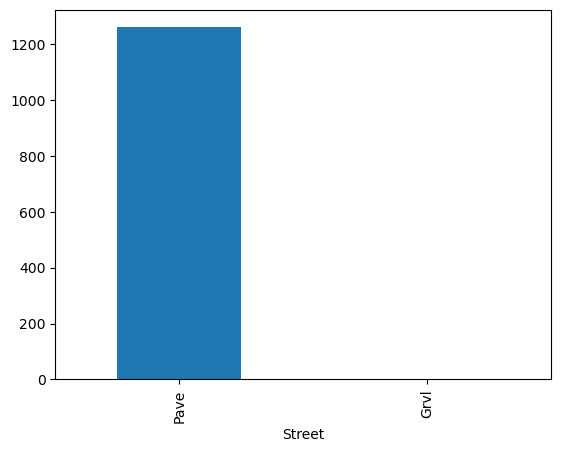

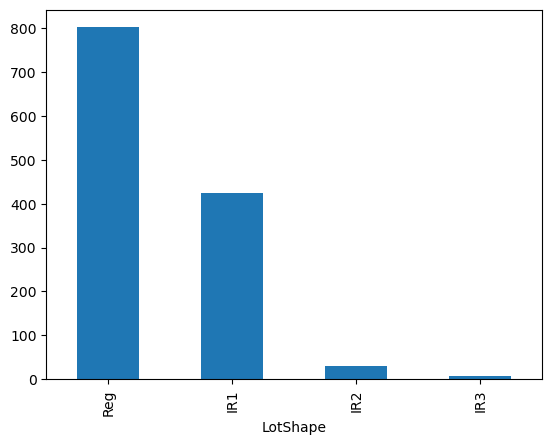

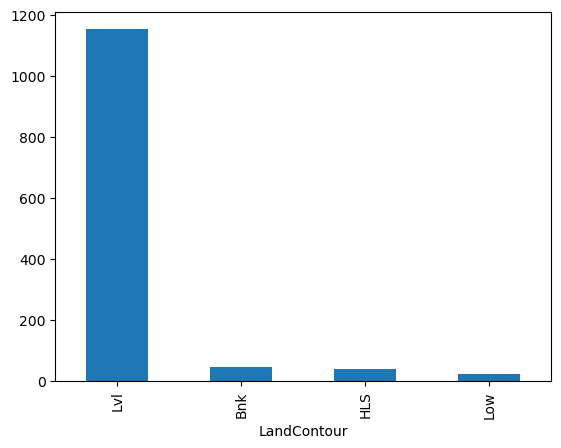

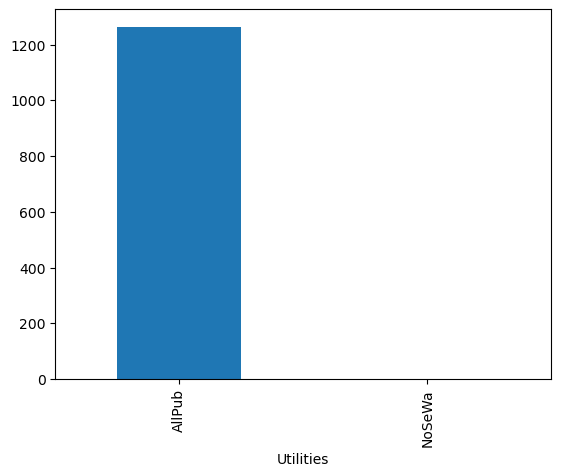

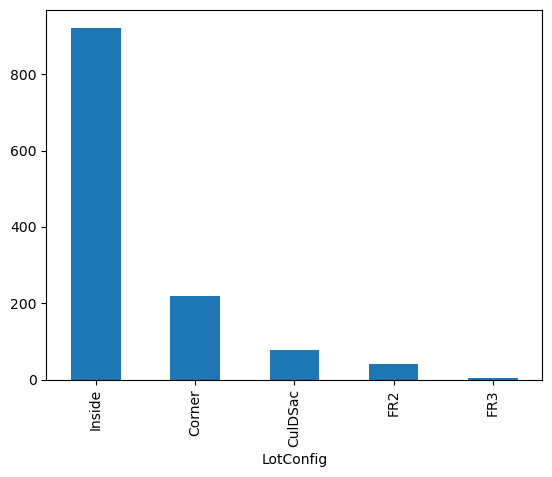

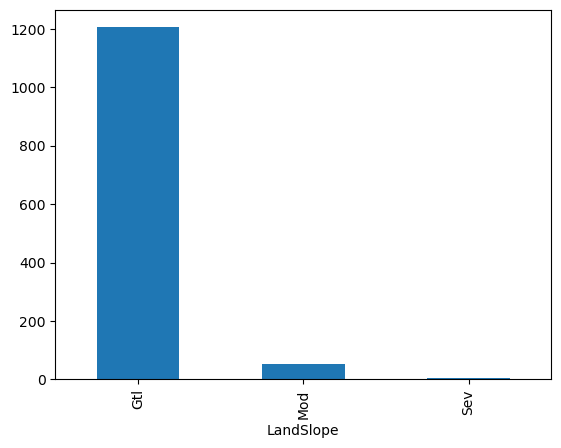

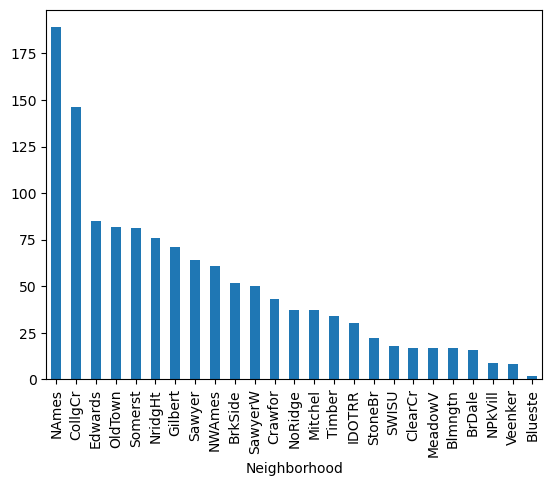

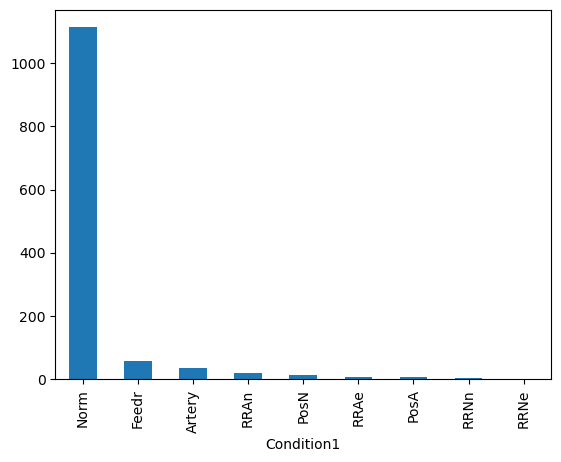

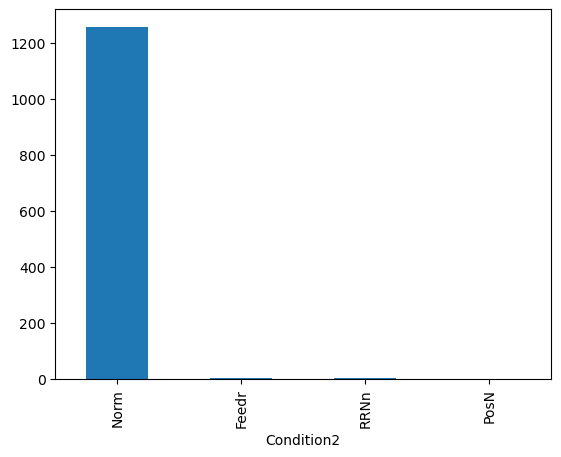

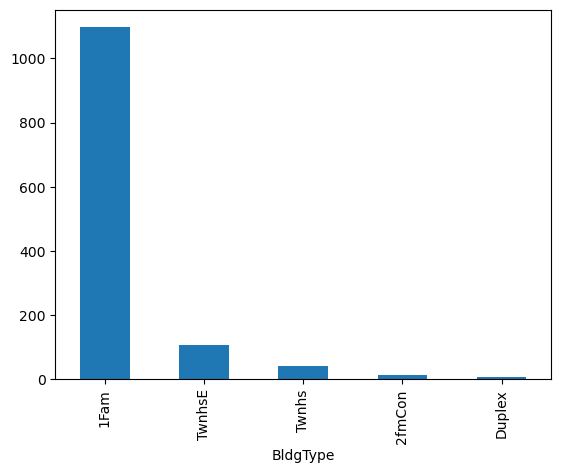

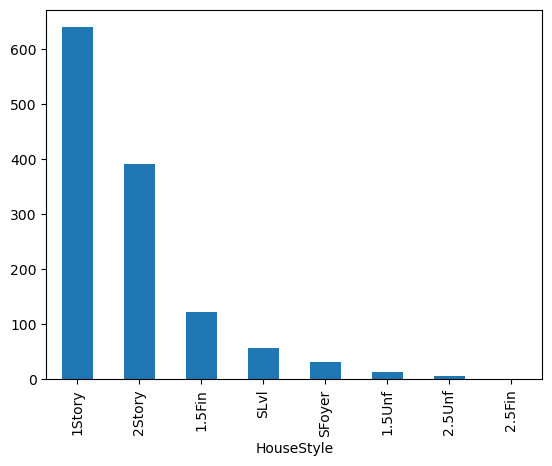

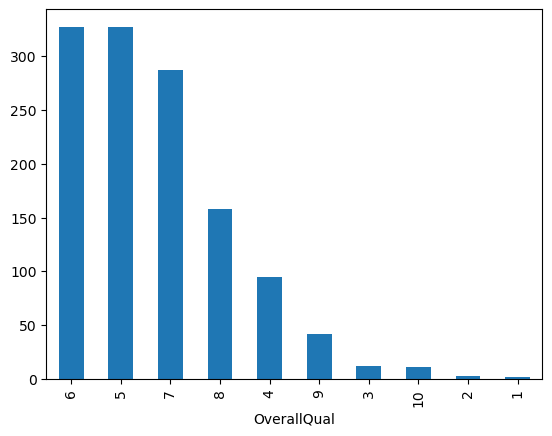

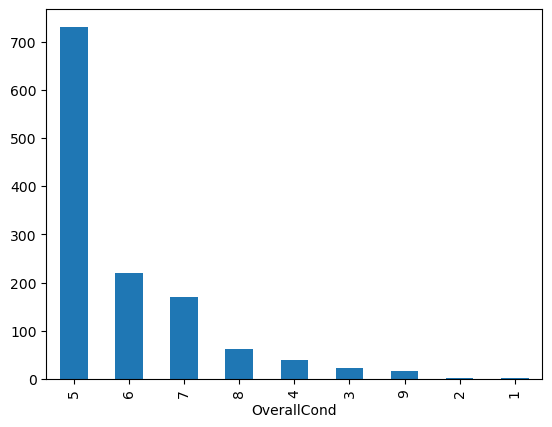

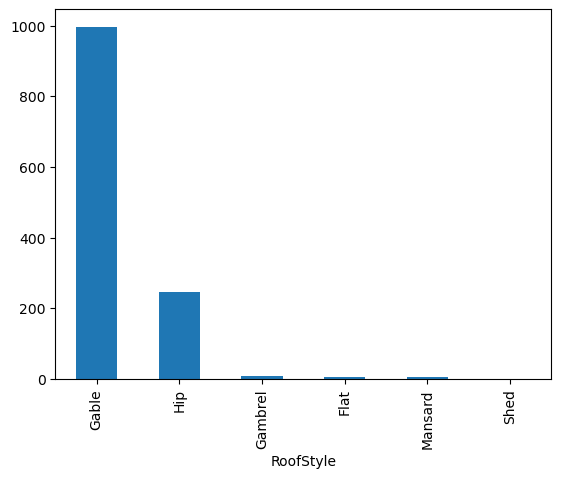

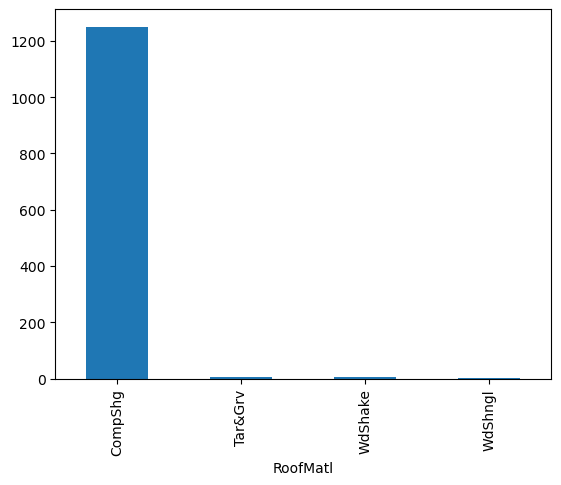

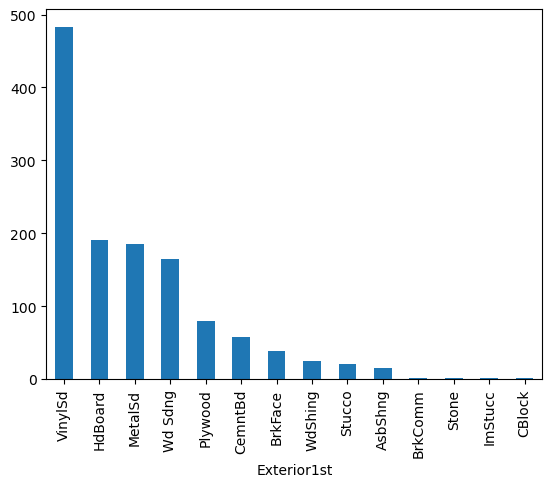

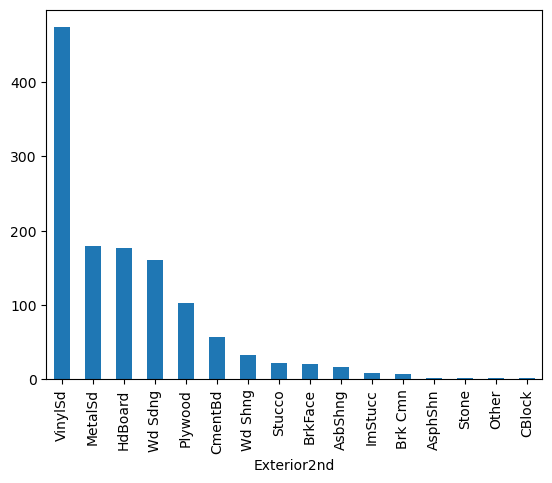

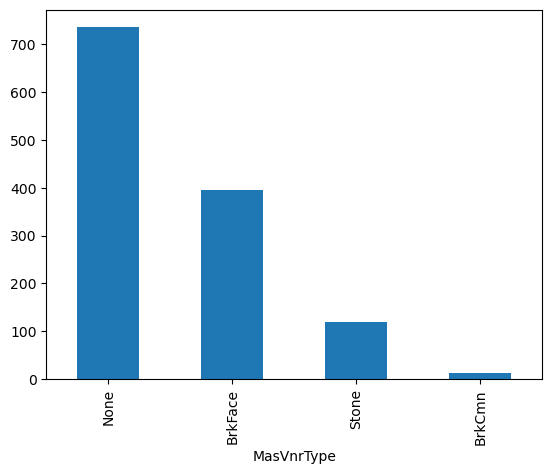

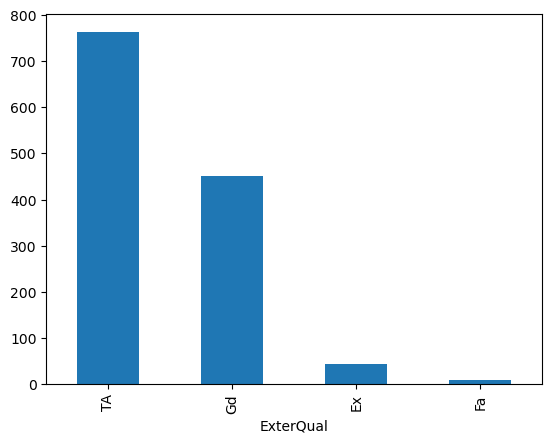

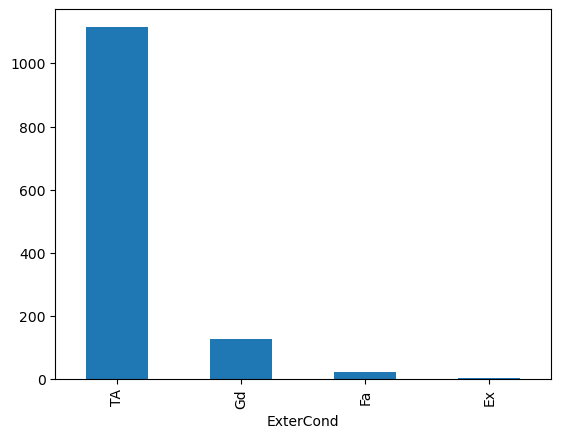

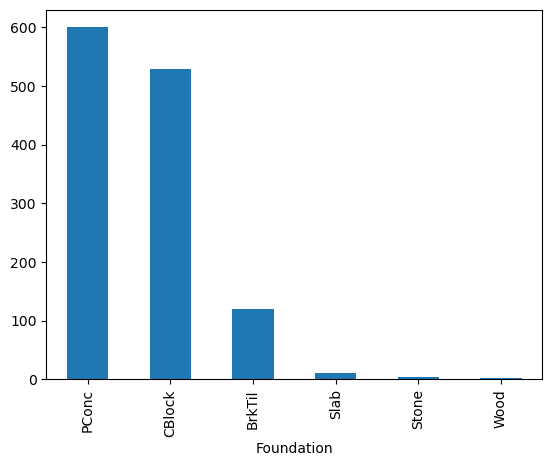

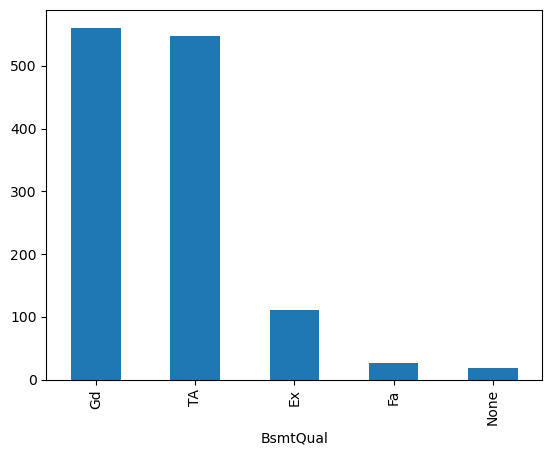

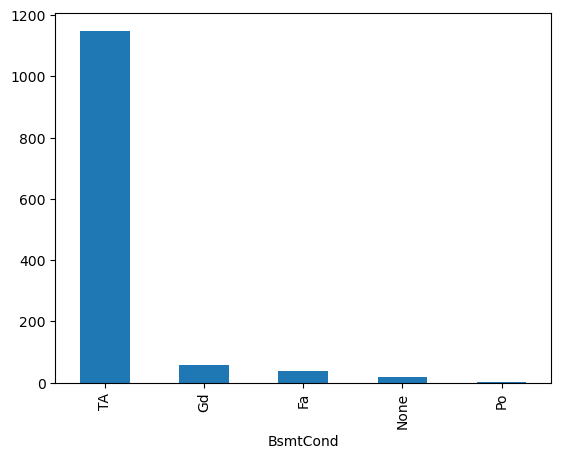

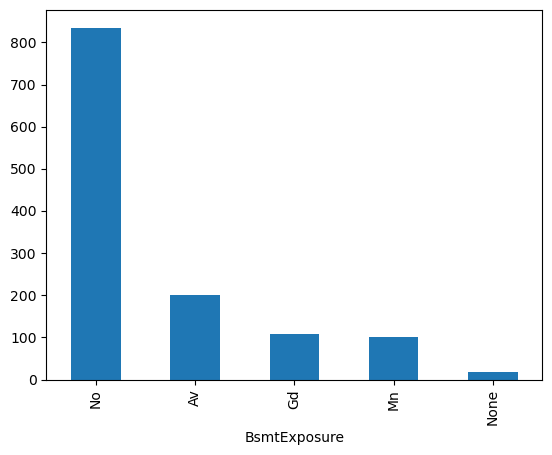

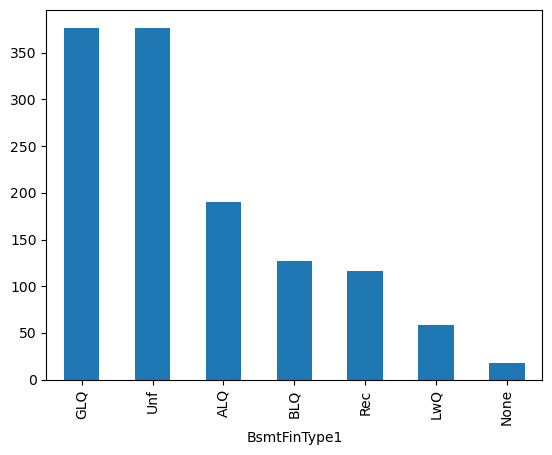

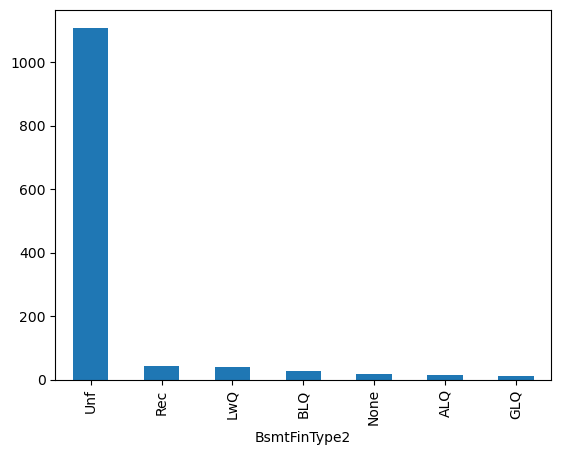

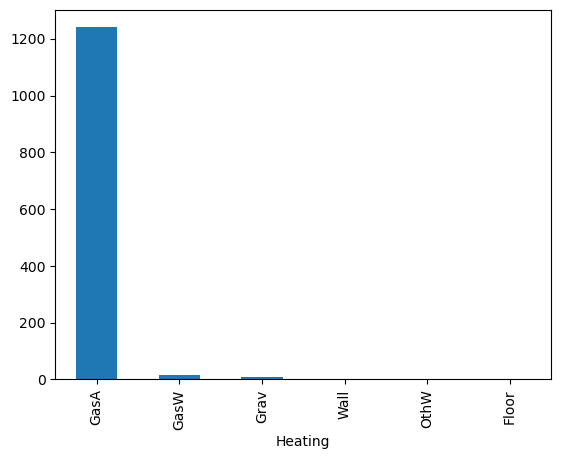

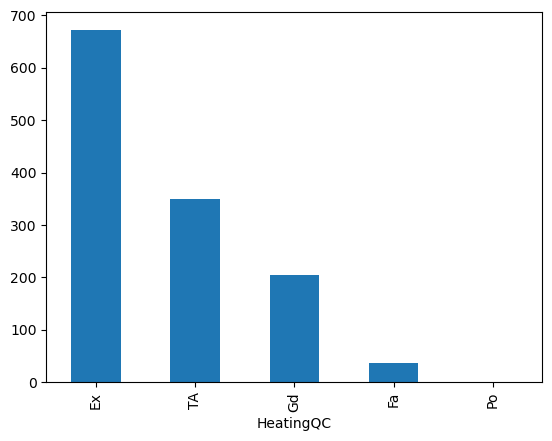

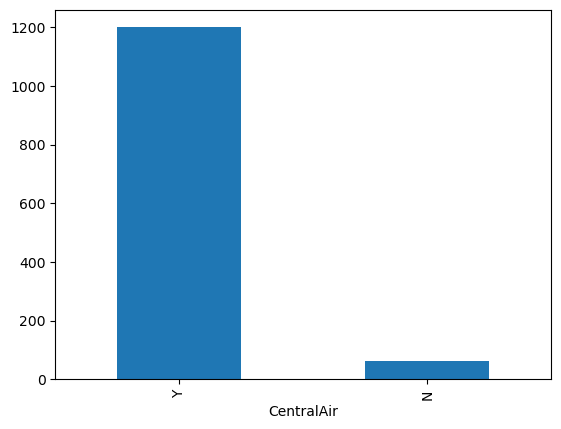

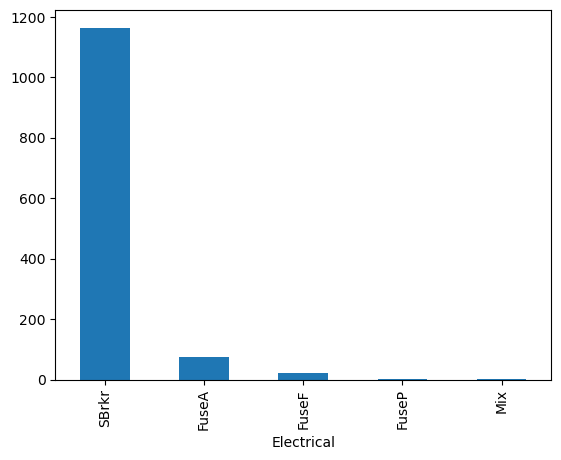

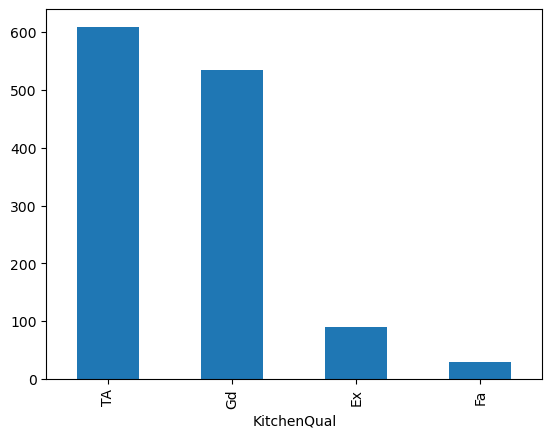

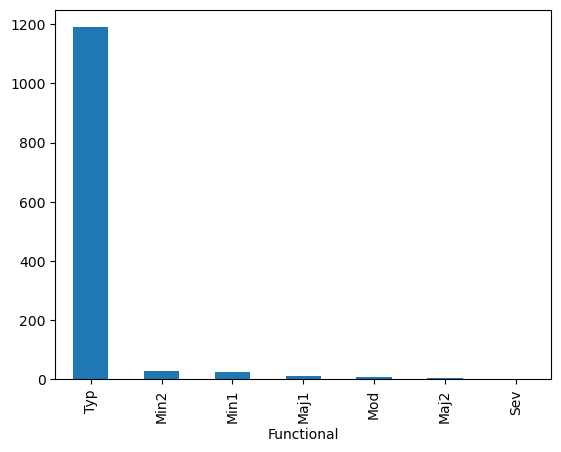

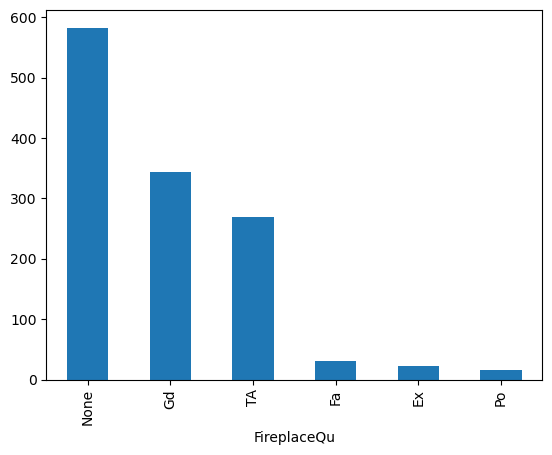

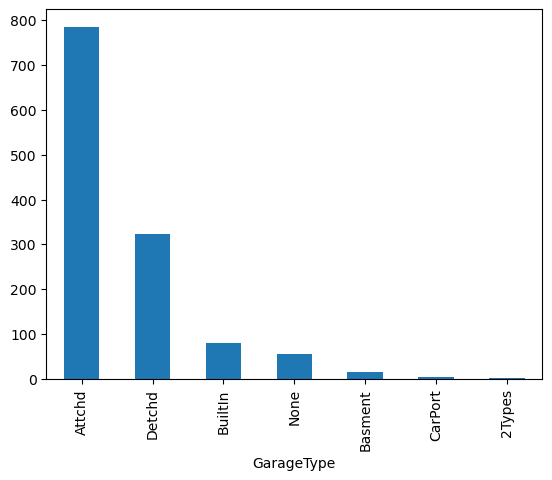

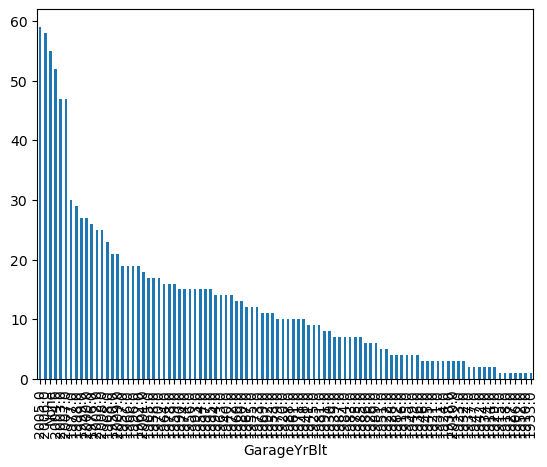

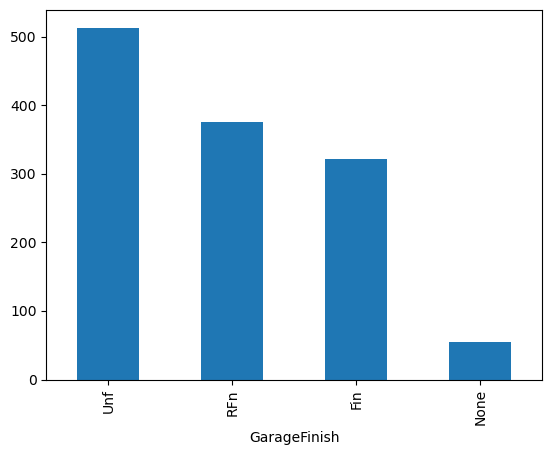

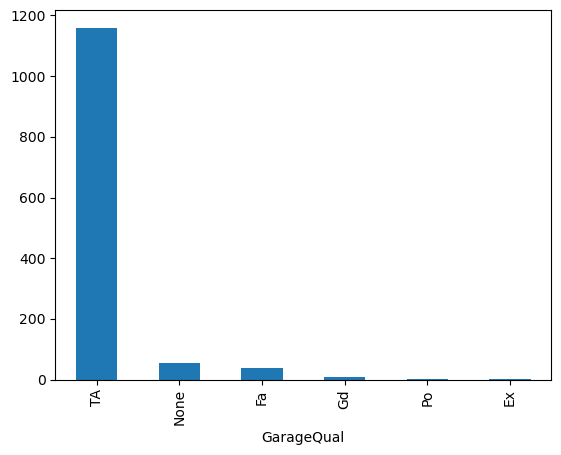

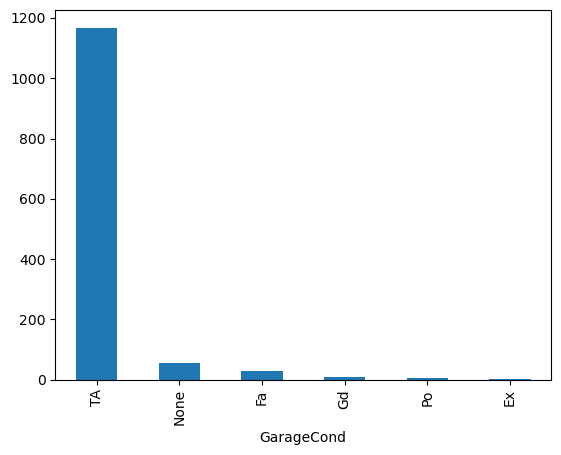

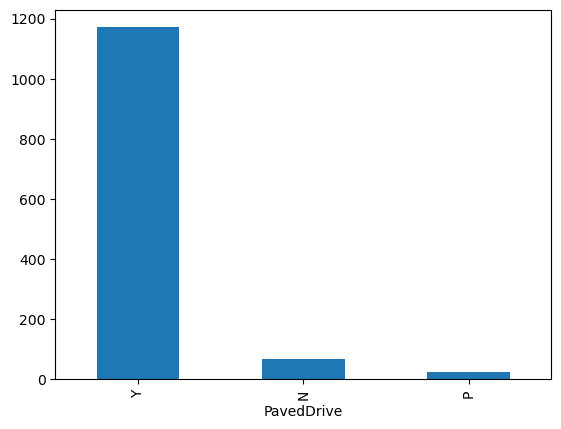

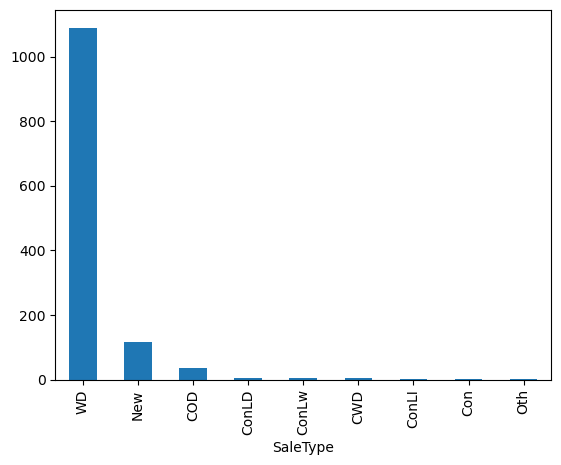

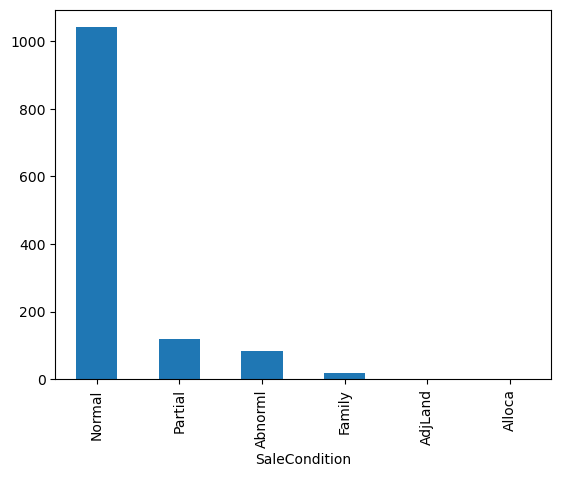

In [252]:
for col in cat_var.columns:
    df[col].value_counts().plot(kind='bar')
    plt.xlabel(col)
    plt.show()

### Feature Engineering

In [253]:
## Create new column for the age of the house
df['Age'] = df['YrSold'] - df['YearBuilt']

# Combining the floors square feet and the basement square feet to create the total sq feet
df['Total_sq_feet'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] +
                                     df['1stFlrSF'] + df['2ndFlrSF'])

# Combining all the bathrooms square feet to create the total bathroom sq feet
df['Total_Bathrooms_sq_feet'] = (df['FullBath'] + (0.5 * df['HalfBath']) +
                                   df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))

# Combining all the porch square feet to create the total porch sq feet
df['Total_porch_sq_feet'] = (df['OpenPorchSF'] + df['EnclosedPorch'] + df['WoodDeckSF'])

In [254]:
# dropping the columns which we used to create new features
df = df.drop(['YrSold', 'YearBuilt','BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','FullBath','HalfBath',
                           'BsmtFullBath','BsmtHalfBath','OpenPorchSF','EnclosedPorch','WoodDeckSF'],axis=1)


In [255]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age,Total_sq_feet,Total_Bathrooms_sq_feet,Total_porch_sq_feet
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,150,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,0,0,0,2,WD,Normal,12.247694,5,2416,3.5,61
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,284,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,0,0,0,0,5,WD,Normal,12.109011,31,2240,2.5,298
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,434,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,0,0,0,9,WD,Normal,12.317167,7,2272,3.5,42
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,540,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,0,0,0,2,WD,Abnorml,11.849398,91,1933,2.0,307
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,490,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,0,0,0,0,12,WD,Normal,12.429216,8,2853,3.5,276


In [256]:
df.describe()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,Total_sq_feet,Total_Bathrooms_sq_feet,Total_porch_sq_feet
count,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.0,1264.000000,1264.000000,1264.0,1264.000000,1264.000000,1264.000000,1264.000000,1264.0,1264.000000,1264.0,1264.0,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000
mean,69.290817,9645.173259,1985.795095,103.800077,575.246835,1057.716772,0.0,1480.293513,2.816456,1.0,6.393196,0.615506,1.783228,476.044304,0.0,14.820411,0.0,0.0,6.294304,12.031827,34.370253,1962.763449,2.184335,160.688291
std,19.970956,4133.080591,20.628907,170.694360,440.100360,397.688580,0.0,481.498381,0.739892,0.0,1.508902,0.629907,0.730841,208.434803,0.0,53.273048,0.0,0.0,2.696662,0.392735,29.473564,691.131941,0.764177,140.414642
min,21.000000,1300.000000,1950.000000,0.000000,0.000000,0.000000,0.0,334.000000,0.000000,1.0,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,10.471950,0.000000,334.000000,1.000000,0.000000
25%,60.000000,7500.000000,1968.000000,0.000000,241.750000,800.000000,0.0,1114.000000,2.000000,1.0,5.000000,0.000000,1.000000,329.500000,0.0,0.000000,0.0,0.0,5.000000,11.782953,6.000000,1484.750000,1.500000,39.750000
50%,70.047500,9356.500000,1995.000000,0.000000,484.000000,990.000000,0.0,1440.000000,3.000000,1.0,6.000000,1.000000,2.000000,478.000000,0.0,0.000000,0.0,0.0,6.000000,12.013701,32.000000,1836.000000,2.000000,144.000000
75%,79.000000,11437.000000,2004.000000,168.250000,808.500000,1277.250000,0.0,1738.250000,3.000000,1.0,7.000000,1.000000,2.000000,576.000000,0.0,0.000000,0.0,0.0,8.000000,12.278393,53.000000,2346.250000,2.500000,244.000000
max,182.000000,36500.000000,2010.000000,1115.000000,2336.000000,3206.000000,0.0,3493.000000,6.000000,1.0,12.000000,3.000000,4.000000,1390.000000,0.0,396.000000,0.0,0.0,12.000000,13.323927,135.000000,4708.000000,4.000000,832.000000


In [257]:
df.shape

(1264, 67)

## Dummy variable 

In [258]:
cat_dummies = pd.get_dummies(cat_var, drop_first=True)
cat_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1918.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1935.0,GarageYrBlt_1936.0,GarageYrBlt_1937.0,GarageYrBlt_1938.0,GarageYrBlt_1939.0,GarageYrBlt_1940.0,GarageYrBlt_1941.0,GarageYrBlt_1942.0,GarageYrBlt_1945.0,GarageYrBlt_1946.0,GarageYrBlt_1947.0,GarageYrBlt_1948.0,GarageYrBlt_1949.0,GarageYrBlt_1950.0,GarageYrBlt_

In [259]:
# concat dummies variable
df = pd.concat([df,cat_dummies], axis=1)
df = df.drop(list(cat_var.columns),axis=1)
df.shape

(1264, 350)

In [260]:
pd.set_option('display.max_columns', None)

In [261]:
df.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,Total_sq_feet,Total_Bathrooms_sq_feet,Total_porch_sq_feet,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1918.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1264 entries, 0 to 1459
Columns: 350 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(4), int64(20), uint8(326)
memory usage: 649.3 KB


## Model Building

In [263]:
X = df.drop(['SalePrice'],axis=1)
y = df['SalePrice']

In [264]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [265]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(884, 349)
(884,)
(380, 349)
(380,)


In [266]:
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'LowQualFinSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age',
 'Total_sq_feet',
 'Total_Bathrooms_sq_feet',
 'Total_porch_sq_feet']

In [267]:
# rescaling numaric and float col, so that we don't get some very large and some small coefficients values.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Linear Regression

In [268]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [269]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-1956942893.4418783
[ 6.04264676e-03  2.90107494e-02  2.03431753e-02  9.26586328e-04
  2.43197456e+10 -2.24420025e+10 -9.26192286e+09 -2.75068089e+10
 -3.19712717e-03 -3.69323855e+10  4.65966838e-04  1.05947299e-02
  1.05674357e-02  1.40544934e-02  5.33019798e+10  1.72654296e-02
 -2.28474634e+09  8.29276335e+09  1.30607621e-03 -6.33172501e-02
  3.90835930e+10  2.22073199e-02  1.35479773e-02 -5.20466156e-02
 -5.58844732e-02  3.94262414e+09 -2.96875731e-02 -3.24942523e-02
  2.96593250e-02 -3.91049712e+09 -1.22112133e-02 -2.11137443e-02
 -2.32208535e+09 -5.10759354e-02 -1.00196838e-01 -5.83925247e-02
 -1.36096954e-01  2.77823448e-01  2.05111027e-01  2.10512161e-01
  1.54493809e-01  1.21832848e-01 -5.88607788e-03  7.56794214e-03
  8.84056091e-03  2.79915333e-02 -2.97327042e-02  1.68061256e-02
 -1.58831358e-01  2.96936035e-02 -6.03141785e-02 -6.94298744e-02
 -1.42822266e-02  5.93501329e-03 -1.06045723e-01  6.05683327e-02
  6.90088272e-02  4.50291634e-02  4.69799042e-02 -1.98030472e-02
  1.1

In [270]:
# Calculating some metrics such as R2 score, RSS and RMSE for Ridge model
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R-Squared (Train) = ", r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R-Squared (Test) = ",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS (Train) = ",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS (Test) = ",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE (Train) = ",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE (Test) = ",mse_test_lr)
metric.append(mse_test_lr**0.5)

R-Squared (Train) =  0.9638171074534344
R-Squared (Test) =  -3.03104996076397e+17
RSS (Train) =  4.946401486902463
RSS (Test) =  1.7607704019417414e+19
MSE (Train) =  0.0055954767951385325
MSE (Test) =  4.633606320899319e+16


## Model 2: Ridge Regression

In [271]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

## Best Ridge hyperparameter alpha

In [272]:
print(model_cv.best_params_)

{'alpha': 6.0}


In [273]:
#Fitting Ridge model for alpha = 8 and printing coefficients which have been penalised
alpha = 8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.25704984e-02  2.33785558e-02  2.98281772e-02  5.03892327e-03
  1.70765739e-02  2.57619194e-02  0.00000000e+00  8.39610057e-02
 -8.27867499e-04  0.00000000e+00  5.65726919e-03  6.59180706e-03
  1.74194897e-02  1.03337256e-02  0.00000000e+00  1.60300350e-02
  0.00000000e+00  0.00000000e+00  3.42711657e-03 -5.46027459e-02
  6.32580138e-02  2.21217275e-02  1.50632838e-02 -1.86606987e-02
  4.40853673e-03  5.17220188e-03 -1.85302157e-03 -1.83428229e-02
  4.82409681e-02  8.36655142e-03  4.84181696e-03  6.17031080e-03
 -8.76240373e-03 -1.09904728e-03 -3.23380138e-02 -8.96892907e-03
 -1.04076182e-02  4.11016998e-02  9.54475287e-03  1.20261016e-02
 -2.74592385e-02  1.59288433e-02  7.54188419e-03 -1.81334844e-03
 -1.64855834e-03  1.65701958e-02 -4.02840754e-02  7.76473764e-03
 -1.11365324e-02  2.32821845e-02 -3.42749441e-02 -1.86461684e-02
 -1.01171276e-02 -1.12937132e-02 -3.85976335e-02  7.97339205e-03
  4.10841883e-03  1.27359158e-02  1.83442862e-02 -1.68754539e-02
  8.25775119e-02 -3.93429

In [274]:
# Calculating some metrics such as R2 score, RSS and RMSE for Ridge model
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R-Squared (Train) = ", r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R-Squared (Test) = ",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS (Train) = ",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS (Test) = ",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE (Train) = ",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE (Test) = ",mse_test_lr)
metric2.append(mse_test_lr**0.5)

R-Squared (Train) =  0.9506367121971203
R-Squared (Test) =  0.9119297437759958
RSS (Train) =  6.748234400340502
RSS (Test) =  5.116098462843109
MSE (Train) =  0.0076337493216521515
MSE (Test) =  0.013463417007481866


In [275]:
## Create a dataframe of ridge cross validation results
ridgeCV_results= pd.DataFrame(model_cv.cv_results_)

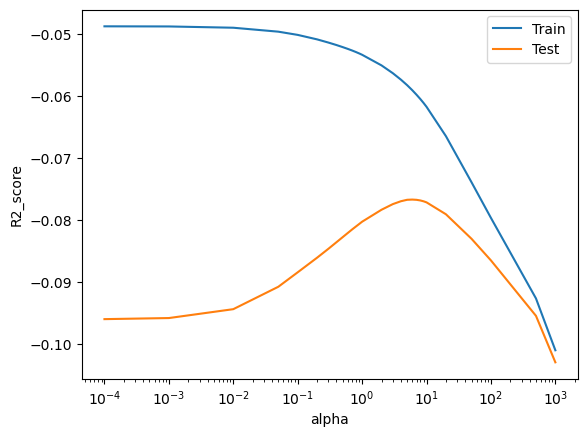

In [276]:
## Plotting R2 score vs alpha values
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

# we can notice that As the value of alpha increases, 
# we see a decrease in train error and an initial increase followed by decrease in test error

## Model 2 : Lasso

In [307]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)              

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

### best hyperparameter alpha for Lasso

In [308]:

print(model_cv.best_params_)

{'alpha': 0.0001}


In [309]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [310]:
lasso.coef_

array([ 9.81517003e-03,  2.24293584e-02,  2.29816005e-02,  2.03606310e-03,
        0.00000000e+00,  3.51884603e-02,  0.00000000e+00,  1.01955479e-01,
       -0.00000000e+00,  0.00000000e+00,  7.20694400e-04,  9.20580467e-03,
        1.40971050e-02,  1.12901662e-02,  0.00000000e+00,  1.62354933e-02,
        0.00000000e+00,  0.00000000e+00,  2.51732134e-03, -6.64421883e-02,
        3.57768171e-02,  2.14041599e-02,  1.64651986e-02, -1.31748034e-02,
        0.00000000e+00,  0.00000000e+00, -7.27141615e-03, -1.56503586e-02,
        4.98107496e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -3.11279043e-03, -7.53724774e-03, -3.04383796e-02, -0.00000000e+00,
       -4.22202445e-03,  8.31030398e-02,  3.80735987e-02,  3.16746839e-02,
       -0.00000000e+00,  6.19838723e-02,  0.00000000e+00,  0.00000000e+00,
        1.06850381e-03,  4.12985940e-03, -6.43965993e-02, -0.00000000e+00,
       -4.05869262e-04,  2.99828052e-02, -4.77036831e-02, -3.85696082e-02,
       -1.23716426e-02, -

In [311]:
# Calculating some metrics such as R2 score, RSS and RMSE for Lasso model
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R-Squared (Train) = ", r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R-Squared (Test) = ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS (Train) = ",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS (Test) = ",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE (Train) = ",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE (Test) = ",mse_test_lr)
metric3.append(mse_test_lr**0.5)

R-Squared (Train) =  0.9586306799211555
R-Squared (Test) =  0.9058285729045953
RSS (Train) =  5.655414809271885
RSS (Test) =  5.470522217865719
MSE (Train) =  0.0063975280647871995
MSE (Test) =  0.014396111099646629


In [312]:
## Create a dataframe of ridge cross validation results
lassoCV_results= pd.DataFrame(model_cv.cv_results_)

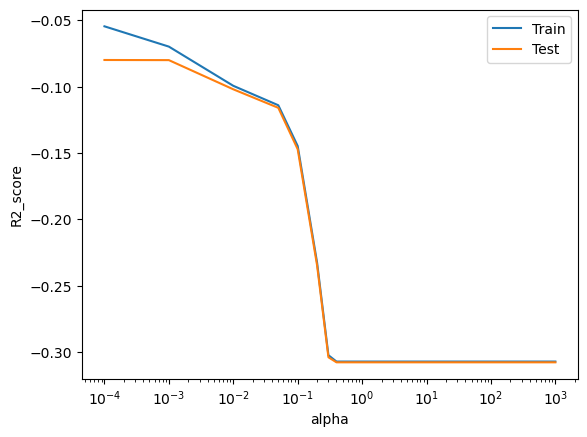

In [313]:
## Plotting R2 score vs alpha values
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

# we can see that, As the value of alpha increases, we see a decrease in both train and test error.

In [314]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.638171e-01,0.950637,0.958631
1,R2 Score (Test),-3.031050e+17,0.911930,0.905829
2,RSS (Train),4.946401e+00,6.748234,5.655415
3,RSS (Test),1.760770e+19,5.116098,5.470522
4,MSE (Train),7.480292e-02,0.087371,0.079985
5,MSE (Test),2.152581e+08,0.116032,0.119984


In [315]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

""
LotFrontage
LotArea
YearRemodAdd
MasVnrArea
BsmtUnfSF
...
SaleCondition_AdjLand
SaleCondition_Alloca
SaleCondition_Family
SaleCondition_Normal


In [316]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [317]:
betas

,Ridge,Lasso
LotFrontage,0.012570,0.009815
LotArea,0.023379,0.022429
YearRemodAdd,0.029828,0.022982
MasVnrArea,0.005039,0.002036
BsmtUnfSF,0.017077,0.000000
...,...,...
SaleCondition_AdjLand,0.024111,0.117568
SaleCondition_Alloca,-0.031160,-0.269758
SaleCondition_Family,-0.033391,-0.064557
SaleCondition_Normal,0.066260,0.066754


### Top 10 coefficients of Ridge regression

In [318]:

betas['Ridge'].sort_values(ascending=False)[:10]

OverallQual_9            0.098069
Neighborhood_StoneBr     0.088598
GrLivArea                0.083961
Neighborhood_Crawfor     0.082578
Functional_Typ           0.081013
SaleCondition_Normal     0.066260
OverallCond_9            0.065554
Total_sq_feet            0.063258
CentralAir_Y             0.057316
SaleCondition_Partial    0.055091
Name: Ridge, dtype: float64

### Top 10 coefficients of Lasso regression

In [319]:
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual_9            0.183165
Neighborhood_StoneBr     0.125621
OverallQual_10           0.124327
SaleCondition_AdjLand    0.117568
OverallCond_9            0.116534
Neighborhood_Crawfor     0.113311
GrLivArea                0.101955
GarageYrBlt_1923.0       0.101094
OverallQual_8            0.100243
SaleCondition_Partial    0.098970
Name: Lasso, dtype: float64

### variables significant in predicting the price of a house are: 

In [320]:
GrLivArea, OverallQual_9, OverallCond_9, OverallQual_8, Neighborhood_Crawfor, Functional_Typ, 
Total_sq_feet, CentralAir_Y, TotalBsmtSF, Neighborhood_StoneBr, 
TotalBsmtSF and SaleCondition_Normal

NameError: name 'GrLivArea' is not defined

## Doubling value of alpha for Ridge and Lasso Model

In [321]:
alpha = 12
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train, y_train)

Ridge(alpha=12)

In [322]:
# Calculating some metrics such as R2 score, RSS and RMSE for Ridge model
y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R-Squared (Train) = ", r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R-Squared (Test) = ",r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS (Train) = ",rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS (Test) = ",rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE (Train) = ",mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE (Test) = ",mse_test_lr)
metric4.append(mse_test_lr**0.5)

R-Squared (Train) =  0.947218736055627
R-Squared (Test) =  0.9118818962992138
RSS (Train) =  7.215490638816237
RSS (Test) =  5.118877975619735
MSE (Train) =  0.008162319727167688
MSE (Test) =  0.013470731514788776


In [323]:
alpha =0.0002

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [324]:
# Calculating some metrics such as R2 score, RSS and RMSE for Lasso model
y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R-Squared (Train) = ", r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R-Squared (Test) = ",r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS (Train) = ",rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS (Test) = ",rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE (Train) = ",mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE (Test) = ",mse_test_lr)
metric5.append(mse_test_lr**0.5)

R-Squared (Train) =  0.9539769059618658
R-Squared (Test) =  0.9114314351886752
RSS (Train) =  6.291611442869189
RSS (Test) =  5.145045759091776
MSE (Train) =  0.007117207514557906
MSE (Test) =  0.013539594102873094


In [325]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }


rg_metric = pd.Series(metric4, name = 'Ridge2 Regression')
ls_metric = pd.Series(metric5, name = 'Lasso2 Regression')

final_metric2 = pd.concat([rg_metric, ls_metric], axis = 1)

final_metric2

,Ridge2 Regression,Lasso2 Regression
0,0.947219,0.953977
1,0.911882,0.911431
2,7.215491,6.291611
3,5.118878,5.145046
4,0.090346,0.084364
5,0.116063,0.116360


In [326]:
# without doubling result 
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.638171e-01,0.950637,0.958631
1,R2 Score (Test),-3.031050e+17,0.911930,0.905829
2,RSS (Train),4.946401e+00,6.748234,5.655415
3,RSS (Test),1.760770e+19,5.116098,5.470522
4,MSE (Train),7.480292e-02,0.087371,0.079985
5,MSE (Test),2.152581e+08,0.116032,0.119984


## Question 3

In [298]:
top5 = ["OverallQual_9","Functional_Typ" ,"Neighborhood_Crawfor", "SaleCondition_Partial", "Neighborhood_StoneBr" ]


In [299]:
X_train2 = X_train.drop(top5,axis=1)
X_test2 = X_test.drop(top5,axis=1)

In [300]:
X_train.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age,Total_sq_feet,Total_Bathrooms_sq_feet,Total_porch_sq_feet,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1918.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrB

In [301]:
lasso3 = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso3, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)              

lasso_cv.fit(X_train2, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [302]:
print(lasso_cv.best_params_)

{'alpha': 0.0001}


In [303]:
alpha =0.0001

lasso3 = Lasso(alpha=alpha)
        
lasso3.fit(X_train2, y_train) 

Lasso(alpha=0.0001)

In [304]:
# Calculating some metrics such as R2 score, RSS and RMSE for Lasso model
y_pred_train = lasso3.predict(X_train2)
y_pred_test = lasso3.predict(X_test2)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R-Squared (Train) = ", r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R-Squared (Test) = ",r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS (Train) = ",rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS (Test) = ",rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE (Train) = ",mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE (Test) = ",mse_test_lr)
metric5.append(mse_test_lr**0.5)

R-Squared (Train) =  0.9565632762953311
R-Squared (Test) =  0.9056754246293032
RSS (Train) =  5.938040316772266
RSS (Test) =  5.479418770338737
MSE (Train) =  0.0067172401773441925
MSE (Test) =  0.014419523079838781


In [305]:
betas['Lasso'] = lasso.coef_

In [306]:
betas['Lasso'].sort_values(ascending=False)[:5]
# after dropping top 5 feature in lasso, these are top 5 feature

OverallQual_9            0.132236
GrLivArea                0.115567
SaleCondition_Partial    0.099857
Functional_Typ           0.096865
Neighborhood_Crawfor     0.093903
Name: Lasso, dtype: float64